In [1]:
# import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [2]:
# load the data from CSV using Pandas library
df = pd.read_csv('data.csv', low_memory = False)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
# check and remove null values
dict(df.isna().sum())

{'date': 0,
 'price': 0,
 'bedrooms': 0,
 'bathrooms': 0,
 'sqft_living': 0,
 'sqft_lot': 0,
 'floors': 0,
 'waterfront': 0,
 'view': 0,
 'condition': 0,
 'sqft_above': 0,
 'sqft_basement': 0,
 'yr_built': 0,
 'yr_renovated': 0,
 'street': 0,
 'city': 0,
 'statezip': 0,
 'country': 0}

# Visualizing Data with Matplotlib

## Creating a simple line plot using Matplotlib

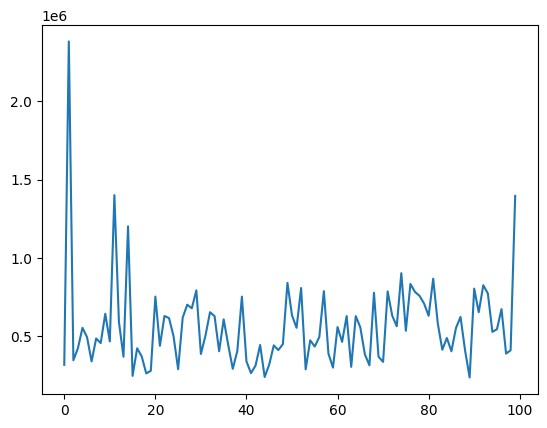

In [4]:
plt.plot(df['price'][:100])

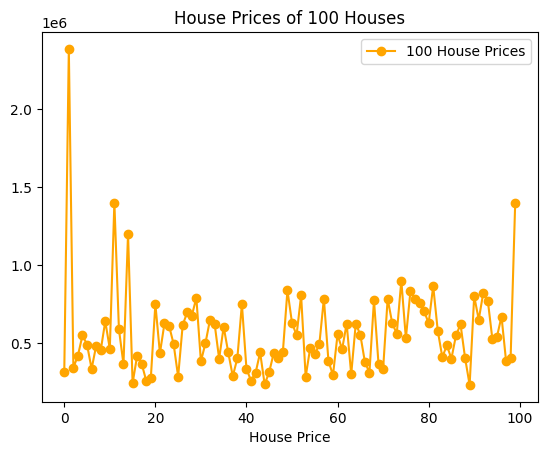

In [5]:
# customize line plot
plt.plot(df['price'][:100], marker = 'o', color = 'orange', label = '100 House Prices')
plt.title('House Prices of 100 Houses')
plt.xlabel('House Price')
plt.legend()

## Creating a simple scatter plot using Matplotlib

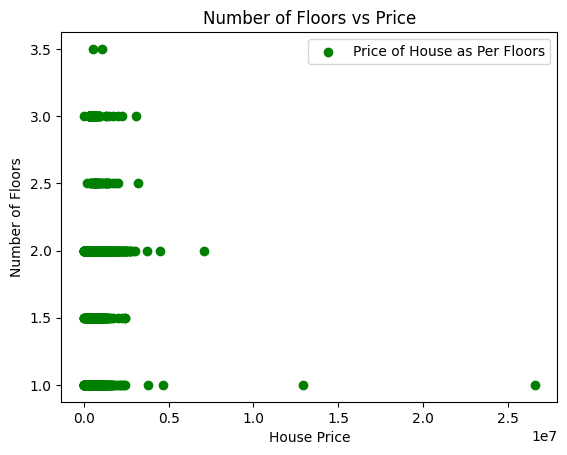

In [6]:
plt.scatter(df['price'], df['floors'], marker = 'o', color = 'green', label = 'Price of House as Per Floors')
plt.title('Number of Floors vs Price')
plt.xlabel('House Price')
plt.ylabel('Number of Floors')
plt.legend()

## Creating a bar plot using Matplotlib

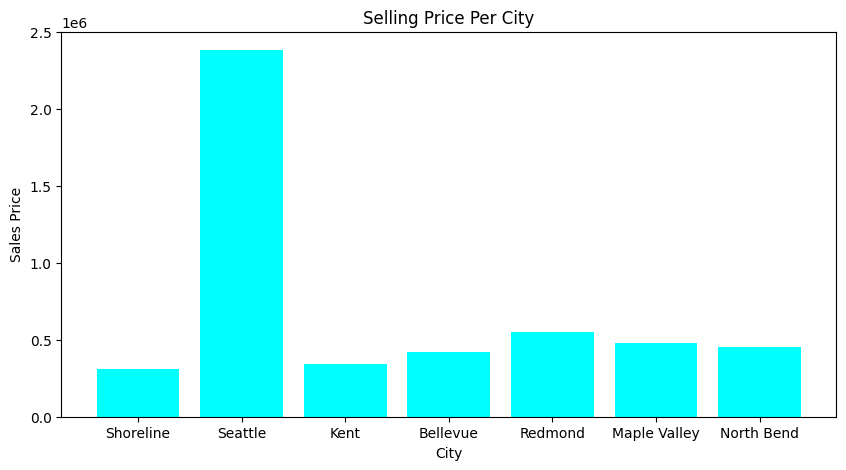

In [7]:
plt.figure(figsize=(10,5))
plt.bar(df['city'][:10],df['price'][:10], color='cyan')
# Create a bar chart with cyan color

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Sales Price')
plt.title('Selling Price Per City')

# Display the chart
plt.show()

## Creating a histogram plot using Matplotlib

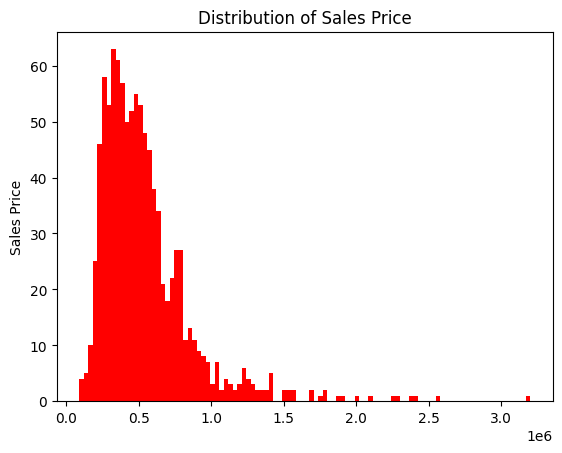

In [8]:
# Create a histogram with cyan color
plt.hist(df['price'][:1000], color='red', bins = 100)

# Adding labels and title
plt.ylabel('Sales Price')
plt.title('Distribution of Sales Price')

# Display the chart
plt.show()

## Creating subplots and multi-axis visualizations

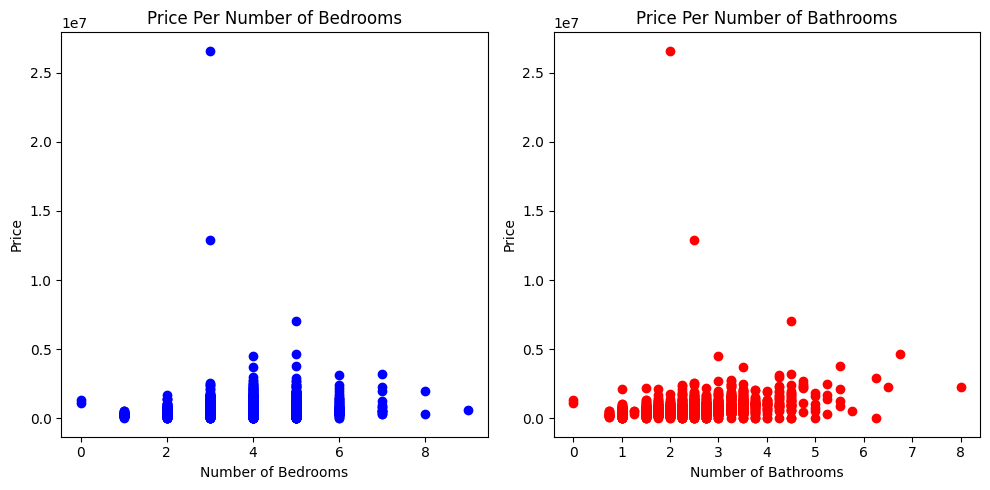

In [9]:
# Create a figure with multiple subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 2 rows, 1 column

# First subplot (left)
axs[0].scatter(df['bedrooms'],df['price'], color='blue')
axs[0].set_title('Price Per Number of Bedrooms')
axs[0].set_xlabel('Number of Bedrooms')
axs[0].set_ylabel('Price')

# Second subplot (right)
axs[1].scatter(df['bathrooms'],df['price'], color='red')
axs[1].set_title('Price Per Number of Bathrooms')
axs[1].set_xlabel('Number of Bathrooms')
axs[1].set_ylabel('Price')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

## Mapping and geographical visualization using Matplotlib 

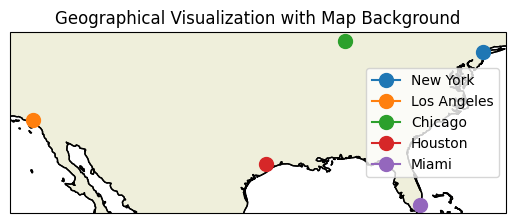

In [10]:
import cartopy.crs as ccrs
import cartopy
import numpy as np

# Sample data: longitude and latitude coordinates
cities = {
    'New York': (40.7128, -74.0060),
    'Los Angeles': (34.0522, -118.2437),
    'Chicago': (41.8781, -87.6298),
    'Houston': (29.7604, -95.3698),
    'Miami': (25.7617, -80.1918)
}

# Create a figure and axis with a map background
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Add map background
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
ax.add_feature(cartopy.feature.COASTLINE)

# Plot cities on the map
for city, (lat, lon) in cities.items():
    ax.plot(lon, lat, marker='o', markersize=10, label=city, transform=ccrs.PlateCarree())

# Set title and legend
ax.set_title('Geographical Visualization with Map Background')
ax.legend()

# Display the map
plt.show()

# Visualizing Data with Plotly

## Creating interactive line and scatter plots

In [27]:
import plotly.express as px

# Create an interactive line plot using Plotly Express
fig_line = px.line(df['price'][:1000], title='Interactive Line Plot')

# Display the plots
fig_line.show()

In [25]:
import plotly.express as px

# Create an interactive scatter plot using Plotly Express
fig_scatter = px.scatter(df, x='price', y='floors', title='Interactive Scatter Plot')

# Display the plots
fig_scatter.show()

## Building bar charts and histograms with interactivity

In [26]:
# Create an interactive bar chart using Plotly Express
fig_bar = px.bar(df[:10], x='city', y='price', color='yr_built',title='Interactive Bar Chart')

# Display the plots
fig_bar.show()

In [13]:
# Create an interactive histogram using Plotly Express
fig_hist = px.histogram(df, x='price', nbins=100, title='Interactive Histogram')

# Display the plots
fig_hist.show()

## Advanced topics: 3D plots and surface plots in Plotly

In [14]:
import plotly.graph_objects as go


# Create a 3D scatter plot
x = np.random.rand(100)
y = np.random.rand(100)
z = x**2 + y**2  # Generating a z-value based on x and y

scatter_plot = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=6))

layout = go.Layout(title='3D Scatter Plot')
fig_scatter = go.Figure(data=[scatter_plot], layout=layout)


# Display the plots
fig_scatter.show()

In [15]:
import plotly.graph_objects as go


# Create a 3D scatter plot
x = np.random.rand(100)
y = np.random.rand(100)
z = x**2 + y**2  # Generating a z-value based on x and y

# Create a surface plot
x_surface = np.linspace(-5, 5, 50)
y_surface = np.linspace(-5, 5, 50)
x_surface, y_surface = np.meshgrid(x_surface, y_surface)
z_surface = np.sin(np.sqrt(x_surface**2 + y_surface**2))

surface_plot = go.Surface(x=x_surface, y=y_surface, z=z_surface)

layout_surface = go.Layout(title='Surface Plot')
fig_surface = go.Figure(data=[surface_plot], layout=layout_surface)

# Display the plots
fig_surface.show()

## Incorporating Plotly maps and geographical visualizations 

In [16]:
import plotly.express as px
# Sample data for a choropleth map
data = {
    'Country': ['USA', 'Canada', 'Mexico', 'Brazil', 'Argentina'],
    'Value': [10, 20, 15, 25, 30]
}

# Create a choropleth map using Plotly Express
choropleth_map = px.choropleth(
    data_frame=data,
    locations='Country',
    locationmode='country names',
    color='Value',
    title='Choropleth Map Example'
)

# show plot
choropleth_map.show()

# Stylish Visualizations with Seaborn

## Creating visually appealing scatter and line plots with Seaborn

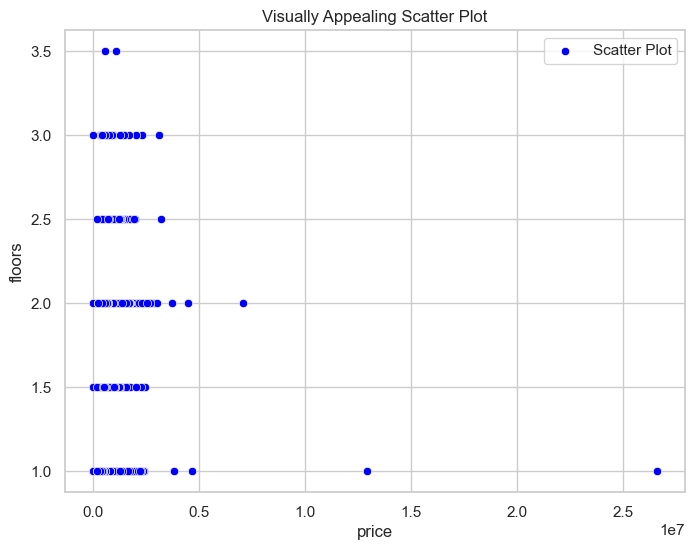

In [17]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='floors', data=df, color='blue', label='Scatter Plot')
plt.title('Visually Appealing Scatter Plot')
plt.legend()

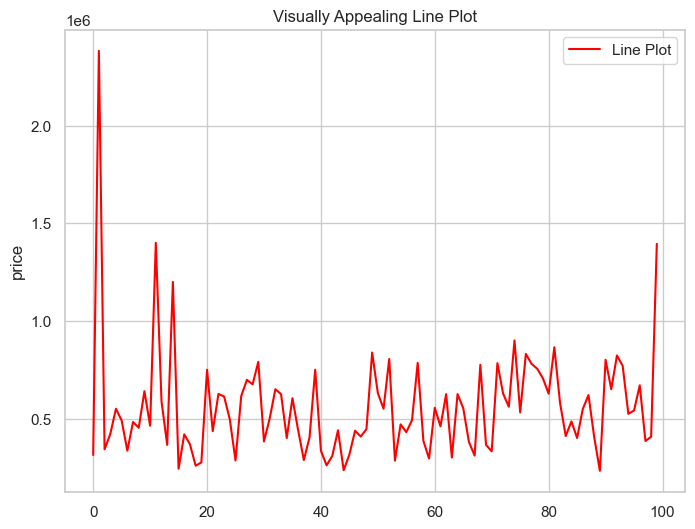

In [18]:
# Set Seaborn style
sns.set(style='whitegrid')


# Create a line plot
plt.figure(figsize=(8, 6))
sns.lineplot(df['price'][:100], color='red', label='Line Plot')
plt.title('Visually Appealing Line Plot')
plt.legend()

## Using Seaborn for statistical data visualization (e.g., distribution plots)

Text(0, 0.5, 'Frequency')

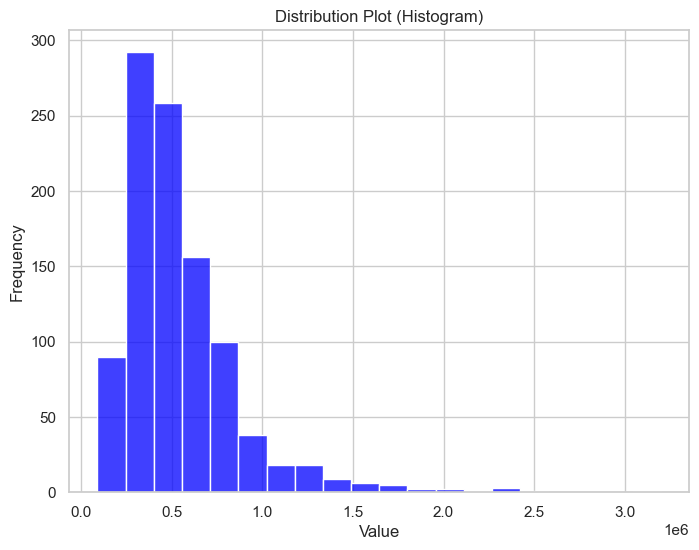

In [19]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create a histogram (distplot)
plt.figure(figsize=(8, 6))
sns.histplot(df['price'][:1000], bins=20, color='blue')
plt.title('Distribution Plot (Histogram)')
plt.xlabel('Value')
plt.ylabel('Frequency')

Text(0, 0.5, 'Density')

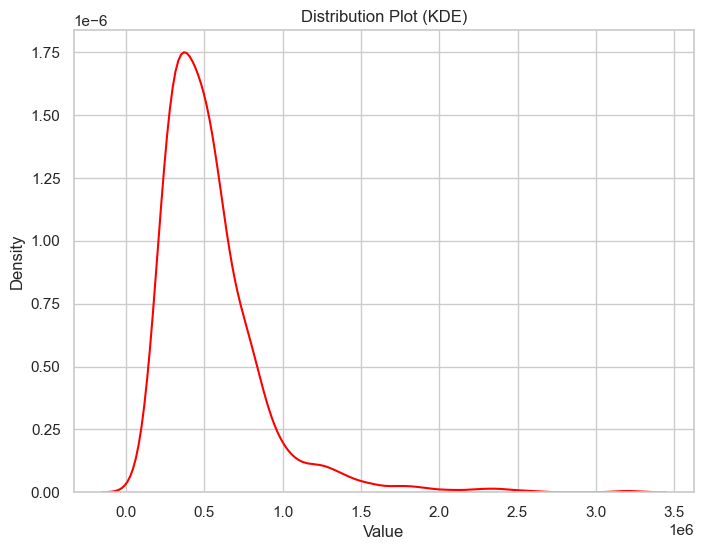

In [20]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create a kernel density estimation (KDE) plot
plt.figure(figsize=(8, 6))
sns.kdeplot(df['price'][:1000], color='red')
plt.title('Distribution Plot (KDE)')
plt.xlabel('Value')
plt.ylabel('Density')

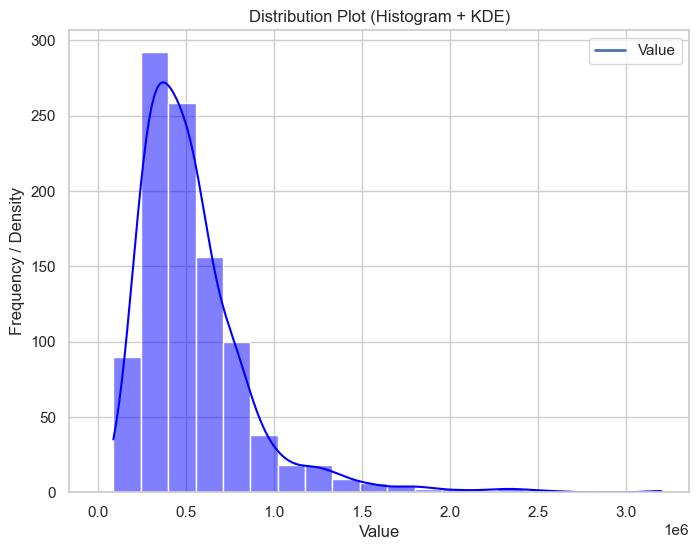

In [21]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create a combination plot with histogram and KDE
plt.figure(figsize=(8, 6))
sns.histplot(df['price'][:1000], bins=20, kde=True, color='blue')
sns.kdeplot(data, color='red', linewidth=2)
plt.title('Distribution Plot (Histogram + KDE)')
plt.xlabel('Value')
plt.ylabel('Frequency / Density')
plt.show()

## Pair plots and heatmap visualizations for correlation analysis

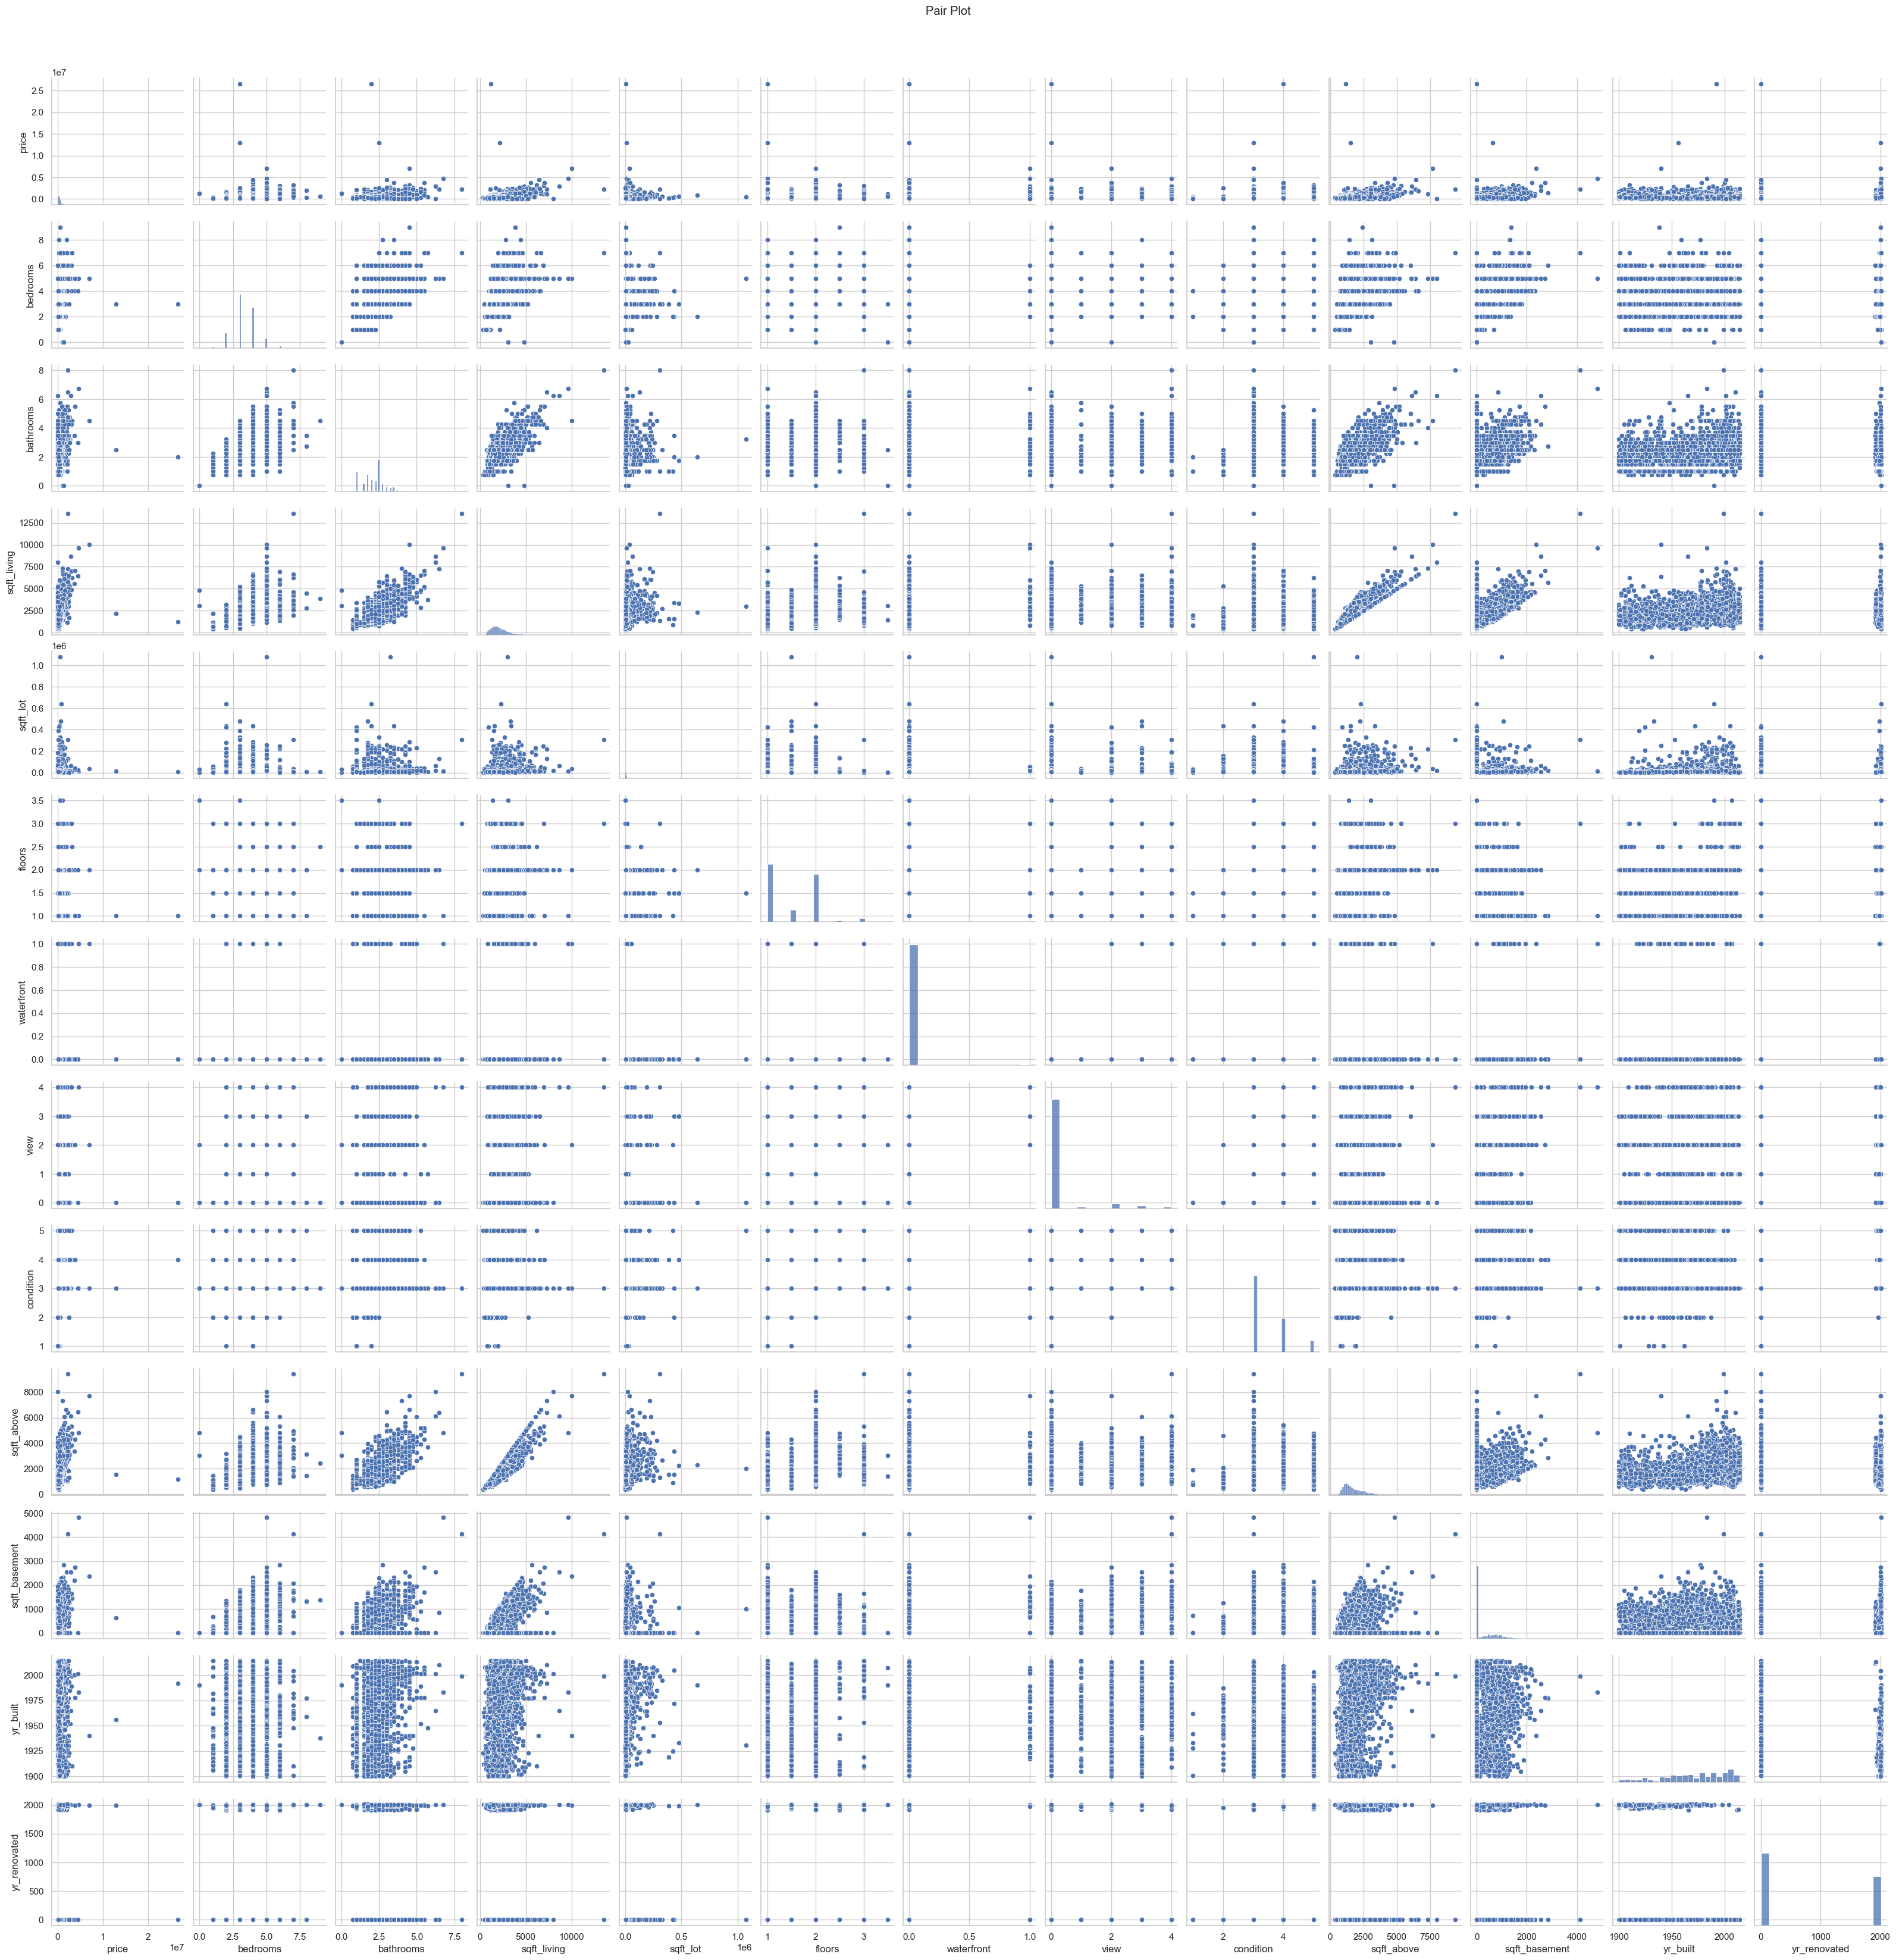

In [ ]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create a pair plot
sns.pairplot(df)
plt.suptitle('Pair Plot', y=1.02)  # Add a title above the plot
plt.show()

/var/folders/0k/ftvl7p0j58v4p29wsgrkgnvr0000gn/T/ipykernel_38058/873003273.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



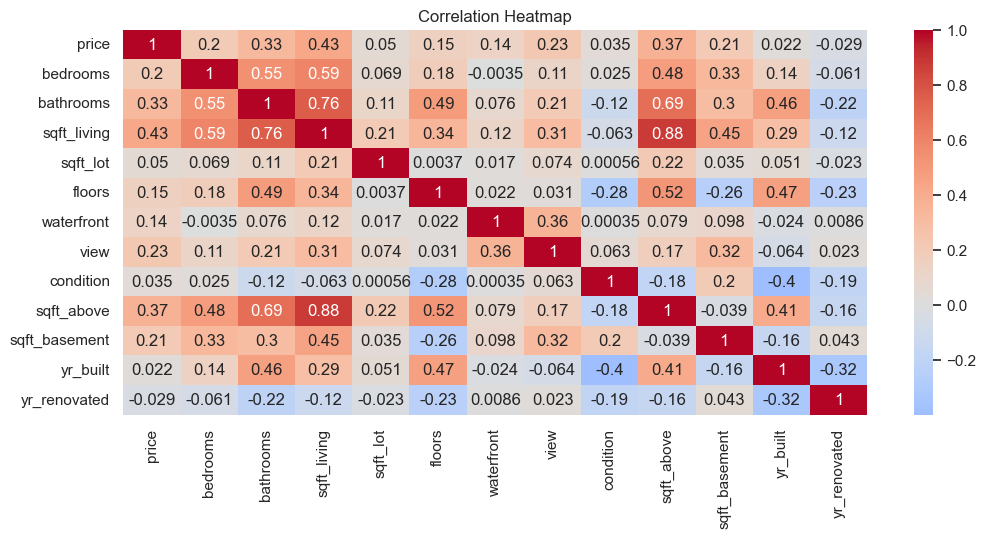

In [23]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()